haha


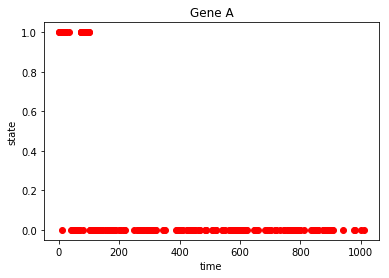

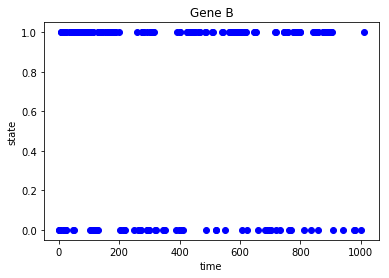

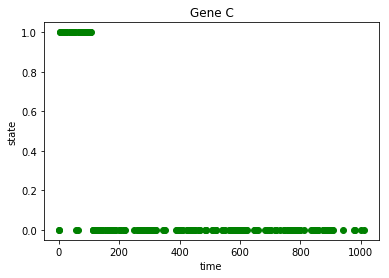

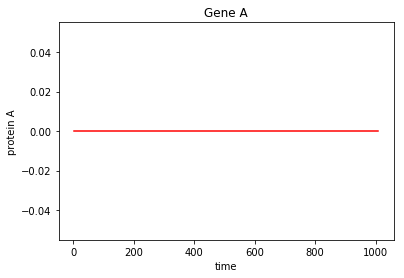

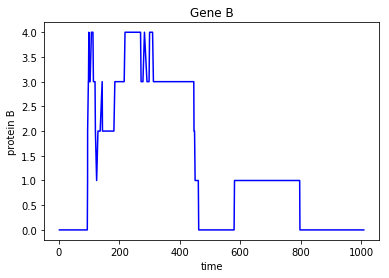

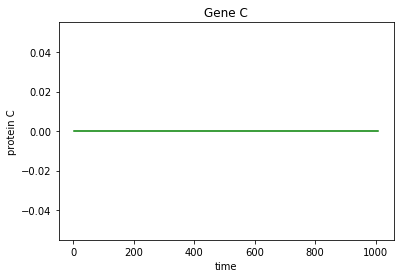

In [33]:
import math
    import random
    import matplotlib.pyplot as plt

    class Gene(object):

        def __init__(self):
            """ initializes a gene object """
            self.k_on = 10
            self.k_off = 3
            self.s_0 = 1
            self.d_0 = 1
            self.s_1 = 2
            self.d_1 = 1
            self.state = 0
            self.rna = 0
            self.prot = 0

        """Actions with on a gene"""   
        def on(self):
            self.state = 1

        def off(self):
            self.state = 0

        def create_rna(self):
            self.rna += 1

        def degradate_rna(self):
            if self.rna > 0:
                self.rna -=1
            else:
                print(self.rna,": RNA amount")

        def create_prot(self):
            self.prot += 1

        def degradate_prot(self):
            if self.prot > 0: 
                self.prot -=1
            else:
                print(self.prot,": PROTEINE amount")

        def get_list_coef(self):
            return [self.k_on, self.k_off, self.s_0 * self.state,self.d_0*self.rna, self.s_1*self.rna, self.d_1*self.prot]

        def get_list_actions(self):
            return [self.on, self.off, self.create_rna, self.degradate_rna, self.create_prot, self.degradate_prot]


        def coef_sum(self):
            return sum([self.k_on * self.state, self.k_off * (1-self.state),
                        self.s_0 * (self.k_on*self.state), 
                        self.d_0 * self.rna, self.s_1 * self.rna,
                        self.d_1 * self.prot])

        def send_prot(self):
            """proteine send to affect other gene"""

    random.seed()
    running_time = 1000.0
    time = 0.0
    print('haha')

    list_prot_A = []
    list_states_A = []

    list_prot_B = []
    list_states_B = []

    list_prot_C = []
    list_states_C = []

    list_times = []


    gene_A = Gene()
    gene_B = Gene()
    gene_C = Gene()
    while (time < running_time):
        time += random.expovariate((gene_A.coef_sum() + gene_B.coef_sum() + gene_C.coef_sum())*0.01)
        action = random.choices(gene_A.get_list_actions() + gene_B.get_list_actions() + gene_C.get_list_actions(),
                                gene_A.get_list_coef() + gene_B.get_list_coef()+gene_C.get_list_coef())


        a = action.pop()
        a()
        gene_A.k_on *= (1/ (1+gene_B.prot)) 
        gene_B.k_on *= (1/ (1+gene_A.prot)) 
        gene_B.k_on *= (1/ (1+gene_C.prot))
        gene_C.k_on *= (1/ (1+gene_B.prot))

        list_states_A.append(gene_A.state)
        list_states_B.append(gene_B.state)
        list_states_C.append(gene_C.state)

        list_prot_A.append(gene_A.prot)   
        list_prot_B.append(gene_B.prot)
        list_prot_C.append(gene_C.prot)

        list_times.append(time)


    plt.plot(list_times, list_states_A, 'ro', color = 'red')
    plt.ylabel('state')
    plt.xlabel('time')
    plt.title('Gene A')
    plt.savefig('statesA_time.png')
    plt.show()

    plt.plot(list_times, list_states_B, 'ro', color = 'blue')
    plt.ylabel('state')
    plt.xlabel('time')
    plt.title('Gene B')
    plt.savefig('statesB_time.png')
    plt.show()

    plt.plot(list_times, list_states_C, 'ro', color = 'green')
    plt.ylabel('state')
    plt.xlabel('time')
    plt.title('Gene C')
    plt.savefig('statesC_time.png')
    plt.show()

    print("================================================")

    plt.plot(list_times, list_prot_A,color = 'red')
    plt.ylabel('protein A')
    plt.xlabel('time')
    plt.title('Gene A')
    plt.savefig('protA_time.png')
plt.show()
          
plt.plot(list_times, list_prot_B,color = 'blue')
plt.ylabel('protein B')
plt.xlabel('time')
plt.title('Gene B')
plt.savefig('protB_time.png')
plt.show()
plt.plot(list_times, list_prot_C,color = 'green')
plt.ylabel('protein C')
plt.xlabel('time')
plt.title('Gene C')
plt.savefig('protC_time.png')
plt.show()